Using transformations
===

Sometimes, the goal is to obtain credible regions not for the
original variable $x$ but for a transformed variable $y=g(x)$.

For this reason, `rectangular_cr.drcr` provides the option
to specify a user-defined variable transformation with the `transform` argument.

Example
---

This can be demonstrated on a two-dimensional example.

Suppose we have done inference for a two-dimensional parameter $x$.

To simulate this, load the two-dimensional test example:

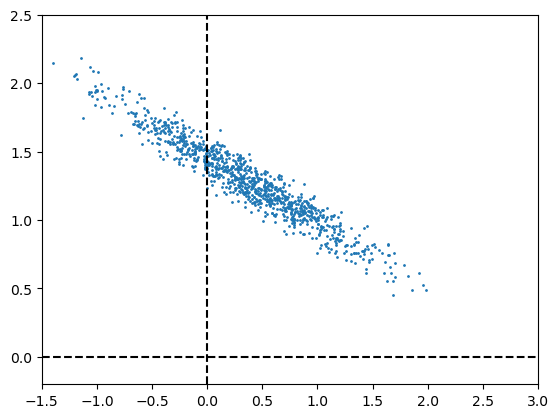

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from examples import two_dimensional_example


num_samples = 1000
mode, _, a, b, samples = two_dimensional_example(num_samples)
theta = 0.95

def g(x):
    return np.sum(np.square(a @ x - b))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlim(-1.5, 3)
ax.set_ylim(-0.2, 2.5)
ax.axhline(0, color="k", linestyle="--")
ax.axvline(0, color="k", linestyle="--")
ax.scatter(samples[:, 0], samples[:, 1], s=1)
plt.show()

Suppose we are actually interested in a weighted parameter

$
\begin{align}
y = \begin{bmatrix} -0.8 & 0.2 \\
0.2 & 0.8
\end{bmatrix} x.
\end{align}
$

(Such situations often arise in the physical sciences, where we are interested
in a quantity $y$ for which we have a model that is parameterized by $x$.)


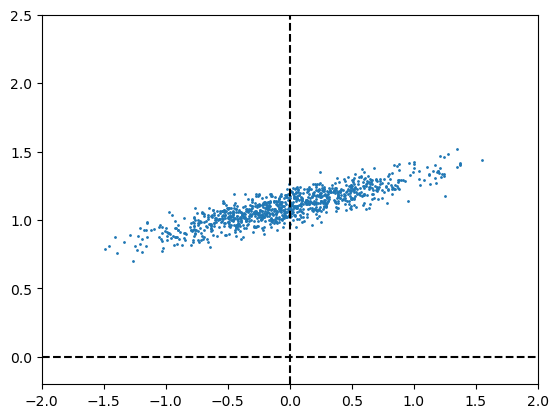

In [6]:
transform_matrix = np.array([[-0.8, 0.2], [0.2, 0.3]])
y_samples = (transform_matrix @ samples.T).T

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlim(-2, 2)
ax.set_ylim(-0.2, 2.5)
ax.axhline(0, color="k", linestyle="--")
ax.axvline(0, color="k", linestyle="--")
ax.scatter(y_samples[:, 0], y_samples[:, 1], s=1)
plt.show()

The `rectangular_cr.drcr` module can compute rectangular credible regions
for $y$ if we specify the `transform`-argument correctly.

In [7]:
from rectangular_cr import drcr

def transform(x):
    y = transform_matrix @ x
    return y
lb, ub, q_est = drcr(theta=0.95, samples=samples, transform=transform, g=g, mode=mode)

Bisection terminated after 10 steps.


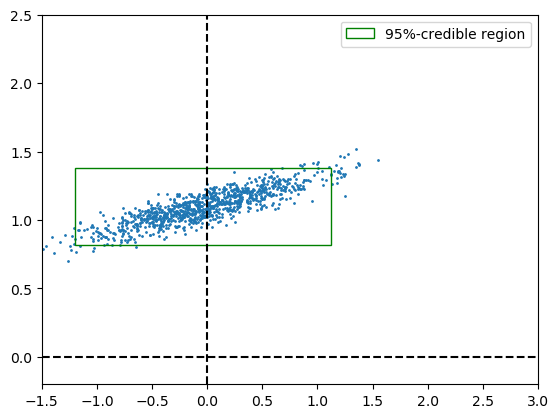

In [9]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlim(-1.5, 3)
ax.set_ylim(-0.2, 2.5)
ax.axhline(0, color="k", linestyle="--")
ax.axvline(0, color="k", linestyle="--")
ax.scatter(y_samples[:, 0], y_samples[:, 1], s=1)
ci = Rectangle(lb, ub[0] - lb[0], ub[1] - lb[1], facecolor="none", edgecolor="g", label="95%-credible region")
ax.add_patch(ci)
plt.legend()
plt.show()






